## Data Cleaning

# Data Cleaning

In this notebook, we explore and clean our initial dataset. We have a dataframe containing meausrements of coral reef cover off of several coasts in the U.S. Virgin islands. The areas are divided into quadrats (areas subdivided into squares) and then are measured by the proportion of the seafloor that is covered in each coral species. 

### Holding Data for Model Evaluation
We plan to tuck away the data from the most recent couple of years and use that as a testing dataset after our model has been trained and optimized. Unfortunately this data will not be independent of the years before (e.g. 2020 coral reef cover is expected to depend on the cover from 2019). However, we care about predicting coral cover in future years, so splitting our data by time will make the most sense for the goal of our project.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
sea_df = pd.read_csv("seawatertemp (1).csv", index_col = "Date") #read in the dataset 
sea_df.index = pd.to_datetime(sea_df.index)
sea_df['year_column'] = sea_df.index.year
sea_df = sea_df[sea_df['Site'].isin(['Yawzi_NPS','Yawzi_9m'])]
specific_value_count = sea_df['Temperature'].value_counts()['nd']
# print(specific_value_count)
sea_df = sea_df[sea_df['Temperature'] != 'nd']
sea_df['Temperature'] = sea_df['Temperature'].astype(float)
avg_sea_temp = sea_df.groupby('year_column')['Temperature'].mean()
avg_sea_temp
# avg_sea_temp.plot()

year_column
1989    27.153627
1990    27.421425
1991    27.324986
1992    27.485410
1993    27.564384
1994    27.395973
1995    27.806966
1996    27.342350
1997    27.808127
1998    28.170986
1999    27.994685
2000    27.482548
2001    27.725918
2002    27.691342
2003    27.361349
2004    28.469801
2005    28.213955
2006    28.030083
2007    28.029944
2008    27.474306
2009    27.650138
2010    28.339280
2011    27.727008
2012    27.858338
2013    27.045025
2014    28.770303
2015    28.070670
2016    27.617150
Name: Temperature, dtype: float64

<AxesSubplot: xlabel='year_column'>

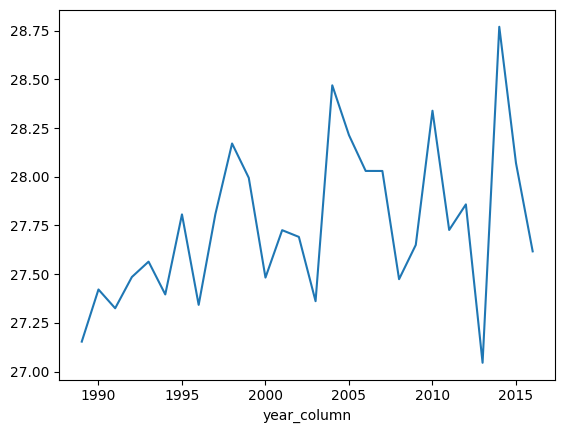

In [ ]:
avg_sea_temp.plot()

In [ ]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 

In [ ]:
df #print and look at the data set 

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB
Date,,,,,,
1987/12/01,Tektite,1,T1Q1,16.5,3.5,6
1987/12/01,Tektite,1,T1Q2,10,6,74
1987/12/01,Tektite,1,T1Q3,13.5,3.5,45
1987/12/01,Tektite,1,T1Q4,15.5,6.5,61.5
1987/12/01,Tektite,1,T1Q5,19,4,48
...,...,...,...,...,...,...
2021/07/01,Yawzi,nd,6,0.0,30.0,50.0
2021/07/01,Yawzi,nd,7,0.0,28.5,45.5
2021/07/01,Yawzi,nd,8,0.5,35.0,35.0


In [ ]:
print(df['percentCover_CTB'].unique()) #check the unique values of the column

['6' '74' '45' '61.5' '48' '10' '3' '29' '38' '30.5' '31.5' '26' '24'
 '11.5' '14.5' '19' '15.5' '22' '16' '19.3' '31' '39' '30' '19.5' '20.5'
 '44.5' '63' '39.5' '46' '62' '6.8' '38.5' '32.5' '21' '36.5' '25.5'
 '10.5' '18' '12.5' '24.5' '32' '14' '25' '33.5' '40.5' '29.8' '33' '41'
 '9' '34.5' '23' '27.5' '29.5' '7.5' '7' '26.5' '22.5' '16.5' '12' '17'
 '16.1' '17.5' '35.5' '50' '37.5' '27' '18.5' '9.5' '37' '41.5' '51'
 '49.5' '20' '42.5' '21.5' '43.5' '40' '28.5' '28' '23.5' '6.5' '15' '11'
 '34' '8.5' '8' '13' '13.5' '36' '30.3' '32.3' '25.6' '30.9' '17.2' '28.8'
 '5.3' '15.1' '15.6' '25.9' '22.6' '8.9' '10.3' '7.6' '8.7' '8.8' '7.3'
 '5.6' '0' '1.6' '25.3' '40.7' '3.2' '4.5' '2.5' '3.5' '5' '18.7' '18.8'
 '20.8' '8.1' '2.6' '12.3' '14.9' '14.1' '2.7' '15.9' '12.8' '15.7' '6.6'
 '13.8' '1.1' '2.2' '33.2' '23.7' '31.4' '26.2' '1' '7.4' '18.6' '4' '1.5'
 '5.5' '22.3' '11.1' '12.2' '11.2' '24.7' '8.2' '4.1' '7.7' '14.3' '9.7'
 '10.2' '10.7' '5.1' '22.7' '17.9' '2' '9.9' '36.2' '30.8'

In [ ]:
print(len(df)) #print the amount of rows of the dataset
#check and print the amount of times there is no data given in the entry for our three main columns
specific_value_count = df['percentCover_CTB'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_macroalgae'].value_counts()['nd']
print(specific_value_count)
specific_value_count = df['percentCover_allCoral'].value_counts()['nd']
print(specific_value_count)


2283
19
19
9


Based on the previous numbers we can drop all of the rows who have "nd" as the value in our main three columns without losing a bunch of data. 

In [ ]:
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
print(len(df))

2264


This leaves us with 2,264 individual rows of data to work with.

In [ ]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral

In [ ]:
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)

In [ ]:
df #print the dataset with the new feature

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


Plot percentage of coral coverage

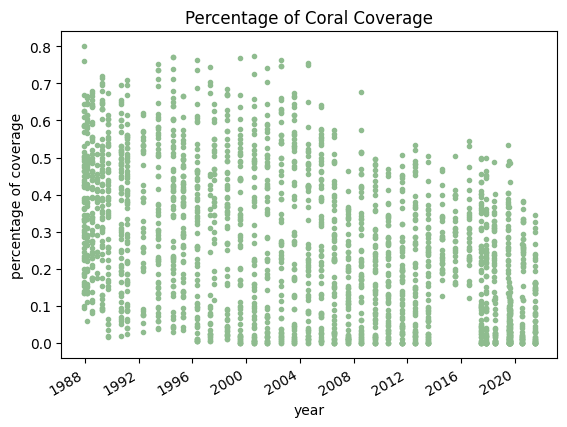

In [ ]:
df.plot(y = "percentCover_allCoral", linestyle = 'None', marker = '.', color = 'darkseagreen', title = 'Percentage of Coral Coverage', ylabel='percentage of coverage', xlabel = 'year',legend=False)
plt.show()

In this plot we can see all the data points of coral reef coverage. While there are seom small outliers, there doesn't appear to be anything extreme enough that we would need to drop that data point.

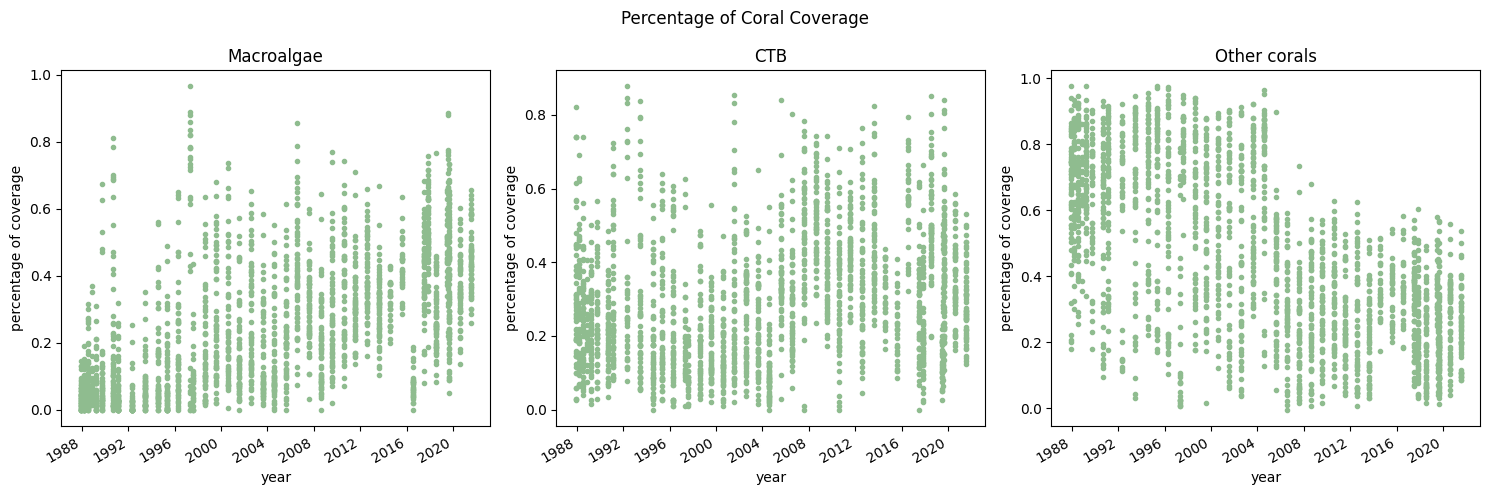

In [ ]:
#plot coral 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15,5))
df.plot(ax = ax1,y = ["percentCover_macroalgae"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Macroalgae', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax2,y = [ "percentCover_CTB"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'CTB', ylabel='percentage of coverage', xlabel = 'year',legend=False)

df.plot(ax = ax3,y = ["percentCover_other"], linestyle = 'None', marker = '.', color = ['darkseagreen'], title = 'Other corals', ylabel='percentage of coverage', xlabel = 'year',legend=False)

fig.suptitle("Percentage of Coral Coverage")
fig.tight_layout()
plt.show()

Plot histogram of difference in average coral coverage each year

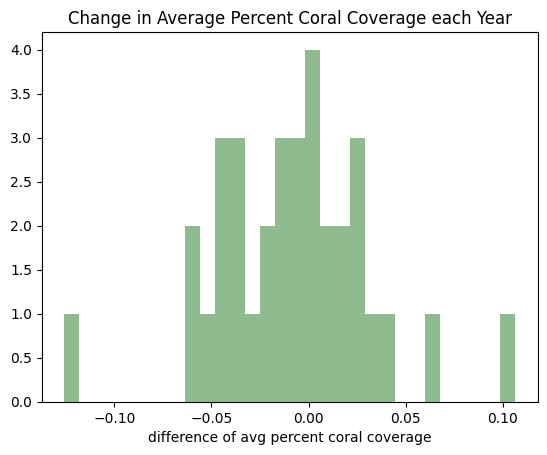

In [ ]:
years = np.arange(1987,2022,1)
difference = []
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    difference.append(curr["percentCover_allCoral"].mean() - past["percentCover_allCoral"].mean())

plt.hist(difference,bins = 30, color = "darkseagreen")
plt.title("Change in Average Percent Coral Coverage each Year")
plt.xlabel("difference of avg percent coral coverage")
plt.show()

We see from the histogram that the change in coral reef cover tends to stay near zero from year to year. This supports our assumption that the cover will depend on previous years. We also see there is slightly more years with negative growth, further supporting our concern that coral reefs are getting smaller over time.

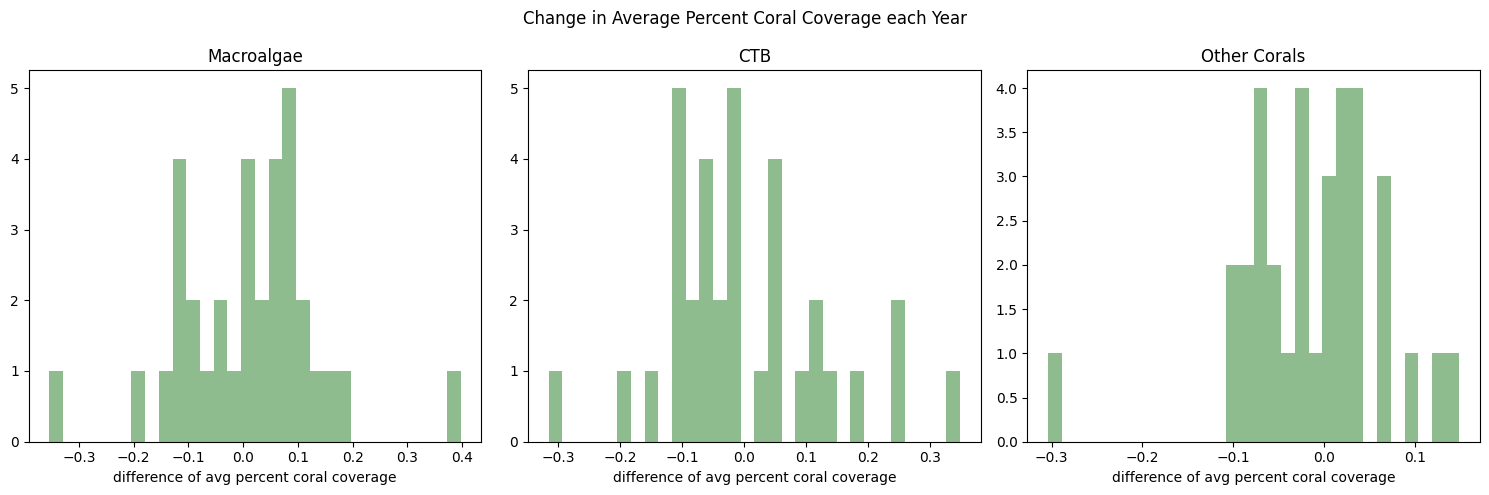

In [ ]:
years = np.arange(1987,2022,1)

#initialize lists for changes in specific types of coral
difference_marco = []
difference_ctb = []
difference_other = []

#calculate the differences from year to year for each coral species
for i in range(len(years)-1,0,-1):
    curr = df.loc[str(years[i])]
    past = df.loc[str(years[i-1])]
    
    difference_marco.append(curr["percentCover_macroalgae"].mean() - past["percentCover_macroalgae"].mean())
    difference_ctb.append(curr["percentCover_CTB"].mean() - past["percentCover_CTB"].mean())
    difference_other.append(curr["percentCover_other"].mean() - past["percentCover_other"].mean())

#plot the percent change in coral reef coverage
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(difference_marco,bins = 30, color = "darkseagreen")
plt.title("Macroalgae")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(132)
plt.hist(difference_ctb,bins = 30, color = "darkseagreen")
plt.title("CTB")
plt.xlabel("difference of avg percent coral coverage")

plt.subplot(133)
plt.hist(difference_other,bins = 30, color = "darkseagreen")
plt.title("Other Corals")
plt.xlabel("difference of avg percent coral coverage")

plt.suptitle("Change in Average Percent Coral Coverage each Year")
plt.tight_layout()
plt.show()

In [ ]:
explore_df = df[df['site'] == 'Tektite']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
explore_df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1988-03-01,Tektite,1,T1Q1,0.195,0.005,0.445,0.550
1988-07-01,Tektite,1,T1Q1,0.255,0.175,0.335,0.490
1989-04-01,Tektite,1,T1Q1,0.310,0.090,0.300,0.610
1989-10-01,Tektite,1,T1Q1,0.245,0.065,0.415,0.520
1990-09-01,Tektite,1,T1Q1,0.310,0.280,0.160,0.560
1991-03-01,Tektite,1,T1Q1,0.215,0.025,0.330,0.645
1993-06-01,Tektite,1,T1Q1,0.163,0.062,0.303,0.635
1994-08-01,Tektite,1,T1Q1,0.226,0.037,0.125,0.838


In [ ]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])
print(percent_cover_all_coral)

[0.165 0.195 0.255 0.31  0.245 0.31  0.215 0.163 0.226 0.29  0.385 0.325
 0.337 0.279 0.221 0.361 0.387 0.389 0.386 0.387 0.224 0.138 0.219 0.264
 0.284 0.197 0.253 0.25  0.215 0.235 0.23  0.41  0.227 0.242 0.308 0.281
 0.161]


## ARMA Model Code

In [ ]:
def sm_arma(array, p_max=3, q_max=3, n=10):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    z = np.diff(array)
    
    best_aic = np.inf #set our values 
    best_model = None
    best_p = None
    best_q = None
    best_std = None
    for p in range(1,p_max+1): #iterate through p and q 
        for q in range(1,q_max+1):
            model = ARIMA(z,order=(p,0,q),trend='c').fit(method='innovations_mle') #set the model and then check if best
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_p = p
                best_q = q
                best_std = model.resid
    
    
    final = best_model.predict(start=0,end=len(z)+n) #return desired value after prediciton
    return best_aic,final,np.std(best_std)

In [ ]:
aic, final,std = sm_arma(percent_cover_all_coral)

In [ ]:
z = np.diff(percent_cover_all_coral)

In [ ]:
print(len(z))
print(z)
print(len(final))
print(final)

36
[ 0.03   0.06   0.055 -0.065  0.065 -0.095 -0.052  0.063  0.064  0.095
 -0.06   0.012 -0.058 -0.058  0.14   0.026  0.002 -0.003  0.001 -0.163
 -0.086  0.081  0.045  0.02  -0.087  0.056 -0.003 -0.035  0.02  -0.005
  0.18  -0.183  0.015  0.066 -0.027 -0.12 ]
47
[-1.34488735e-04 -8.14832698e-03 -2.58161958e-02 -4.11108173e-02
 -1.01444411e-02 -3.51044411e-02  8.51466974e-03  2.99003789e-02
 -6.02972483e-04 -2.92209732e-02 -7.00853446e-02 -3.75116528e-02
 -4.06112623e-02 -1.09375694e-02  1.70314778e-02 -5.05782798e-02
 -6.03965365e-02 -5.83741375e-02 -5.41827431e-02 -5.22502072e-02
  2.95073990e-02  7.03154551e-02  2.75938497e-02  4.26379735e-03
 -5.85712055e-03  3.74211857e-02  8.21083814e-03  9.35821697e-03
  2.64601270e-02  1.55477626e-02  1.75083730e-02 -7.34869262e-02
  2.06235054e-02  1.24166458e-02 -2.13007607e-02 -7.16269243e-03
  5.36791961e-02  2.50572290e-02  1.16584714e-02  5.38613161e-03
  2.44987080e-03  1.07532353e-03  4.31858824e-04  1.30634679e-04
 -1.03769183e-05 -7.63

In [ ]:
# time = np.arange(1987,2022,1)
# time2 = np.arange(1987,2022+10,1)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
print(len(time))
print(time)
print(len(time2))
print(time2)

36
[1987.         1987.97142857 1988.94285714 1989.91428571 1990.88571429
 1991.85714286 1992.82857143 1993.8        1994.77142857 1995.74285714
 1996.71428571 1997.68571429 1998.65714286 1999.62857143 2000.6
 2001.57142857 2002.54285714 2003.51428571 2004.48571429 2005.45714286
 2006.42857143 2007.4        2008.37142857 2009.34285714 2010.31428571
 2011.28571429 2012.25714286 2013.22857143 2014.2        2015.17142857
 2016.14285714 2017.11428571 2018.08571429 2019.05714286 2020.02857143
 2021.        ]
47
[1987.         1987.95652174 1988.91304348 1989.86956522 1990.82608696
 1991.7826087  1992.73913043 1993.69565217 1994.65217391 1995.60869565
 1996.56521739 1997.52173913 1998.47826087 1999.43478261 2000.39130435
 2001.34782609 2002.30434783 2003.26086957 2004.2173913  2005.17391304
 2006.13043478 2007.08695652 2008.04347826 2009.         2009.95652174
 2010.91304348 2011.86956522 2012.82608696 2013.7826087  2014.73913043
 2015.69565217 2016.65217391 2017.60869565 2018.56521739 2019.

In [ ]:
explore_df = df[df['site'] == 'Yawzi']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
explore_df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Yawzi,1,T1Q1,0.570,0.005,0.215,0.780
1988-03-01,Yawzi,1,T1Q1,0.490,0.000,0.250,0.750
1988-07-01,Yawzi,1,T1Q1,0.440,0.005,0.290,0.705
1989-04-01,Yawzi,1,T1Q1,0.480,0.035,0.235,0.730
1989-10-01,Yawzi,1,T1Q1,0.510,0.040,0.145,0.815
1990-09-01,Yawzi,1,T1Q1,0.520,0.085,0.075,0.840
1991-03-01,Yawzi,1,T1Q1,0.450,0.000,0.085,0.915
1992-05-01,Yawzi,1,T1Q1,0.517,0.000,0.189,0.811
1993-06-01,Yawzi,1,T1Q1,0.648,0.075,0.140,0.785


In [ ]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])
print(percent_cover_all_coral)

[0.57  0.49  0.44  0.48  0.51  0.52  0.45  0.517 0.648 0.544 0.374 0.687
 0.745 0.616 0.32  0.603 0.589 0.539 0.601 0.417 0.441 0.4   0.368 0.324
 0.356 0.459 0.452 0.452 0.335 0.49  0.485 0.051 0.5   0.444]


In [ ]:
aic, final,std = sm_arma(percent_cover_all_coral)

In [ ]:
z = np.diff(percent_cover_all_coral)

In [ ]:
print(len(z))
print(z)
print(len(final))
print(final)

33
[-0.08  -0.05   0.04   0.03   0.01  -0.07   0.067  0.131 -0.104 -0.17
  0.313  0.058 -0.129 -0.296  0.283 -0.014 -0.05   0.062 -0.184  0.024
 -0.041 -0.032 -0.044  0.032  0.103 -0.007  0.    -0.117  0.155 -0.005
 -0.434  0.449 -0.056]
44
[-0.00457586  0.02432928  0.06623698  0.01681209 -0.04101648 -0.05241812
  0.01643183 -0.02309803 -0.16001424 -0.0699738   0.14091613 -0.11327093
 -0.26007094 -0.07289419  0.25548244  0.0326856  -0.10434916 -0.01874656
 -0.04774091  0.0908686   0.10567232  0.07515865  0.07952902  0.08796979
  0.03474601 -0.0884384  -0.09795479 -0.05995054  0.05587018 -0.0532246
 -0.1030294   0.29805705 -0.01995313 -0.17326996  0.063937    0.05239955
 -0.05059325 -0.01764705  0.01953459 -0.00523348 -0.01518332 -0.00142002
 -0.0006824  -0.00703788]


In [ ]:
# time = np.arange(1987,2022,1)
# time2 = np.arange(1987,2022+10,1)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
print(len(time))
print(time)
print(len(time2))
print(time2)

33
[1987.     1988.0625 1989.125  1990.1875 1991.25   1992.3125 1993.375
 1994.4375 1995.5    1996.5625 1997.625  1998.6875 1999.75   2000.8125
 2001.875  2002.9375 2004.     2005.0625 2006.125  2007.1875 2008.25
 2009.3125 2010.375  2011.4375 2012.5    2013.5625 2014.625  2015.6875
 2016.75   2017.8125 2018.875  2019.9375 2021.    ]
44
[1987.         1988.02325581 1989.04651163 1990.06976744 1991.09302326
 1992.11627907 1993.13953488 1994.1627907  1995.18604651 1996.20930233
 1997.23255814 1998.25581395 1999.27906977 2000.30232558 2001.3255814
 2002.34883721 2003.37209302 2004.39534884 2005.41860465 2006.44186047
 2007.46511628 2008.48837209 2009.51162791 2010.53488372 2011.55813953
 2012.58139535 2013.60465116 2014.62790698 2015.65116279 2016.6744186
 2017.69767442 2018.72093023 2019.74418605 2020.76744186 2021.79069767
 2022.81395349 2023.8372093  2024.86046512 2025.88372093 2026.90697674
 2027.93023256 2028.95348837 2029.97674419 2031.        ]


A deeper look into data from 2012

In [ ]:
#look at 2012
df_12 = df.loc['2012']
df_12

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
2012-08-01,Tektite,1,T1Q1,0.253,0.348,0.328,0.324
2012-08-01,Tektite,1,T1Q2,0.216,0.276,0.427,0.297
2012-08-01,Tektite,1,T1Q3,0.271,0.347,0.231,0.422
2012-08-01,Tektite,1,T1Q4,0.095,0.322,0.548,0.130
2012-08-01,Tektite,1,T1Q5,0.345,0.380,0.245,0.375
2012-08-01,Tektite,1,T1Q6,0.205,0.260,0.490,0.250
2012-08-01,Tektite,1,T1Q7,0.212,0.318,0.460,0.222
2012-08-01,Tektite,1,T1Q8,0.171,0.372,0.432,0.196
2012-08-01,Tektite,1,T1Q9,0.381,0.310,0.218,0.472


Finding average over quadrants

In [ ]:
df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


In [ ]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
df['year_column'] = df.index.year
df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other,year_column
Date,,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905,1987
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200,1987
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515,1987
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320,1987
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480,1987
...,...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200,2021
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260,2021
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300,2021


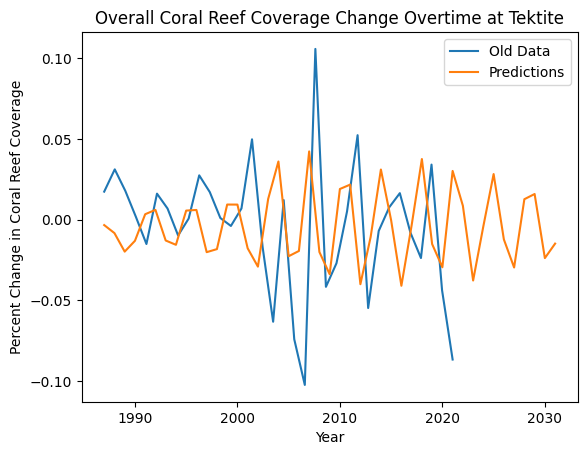

In [ ]:
df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std = sm_arma(avg_percent_cover_allcoral_tektite)
z = np.diff(avg_percent_cover_allcoral_tektite)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Tektite')
plt.legend()
plt.show()

In [ ]:
avg_percent_cover_allcoral_tektite_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_tektite_prediction += np.mean(avg_percent_cover_allcoral_tektite.iloc[:5])
print(avg_percent_cover_allcoral_tektite_prediction)

[0.36229726 0.35893842 0.35060451 0.33079713 0.3176874  0.32106111
 0.32713903 0.3142278  0.29864262 0.30426879 0.31028745 0.29014455
 0.27189344 0.28126685 0.29061048 0.27286049 0.24374652 0.25658935
 0.29265615 0.26999669 0.2505946  0.29289496 0.27283683 0.23903216
 0.25804377 0.2797686  0.23976714 0.22903824 0.26013433 0.25973636
 0.21877271 0.21526882 0.25284276 0.23771549 0.2082041  0.23842318
 0.24705575 0.20935466 0.20533173 0.23361293 0.22135952 0.19170534
 0.20438692 0.22028419 0.19645699]


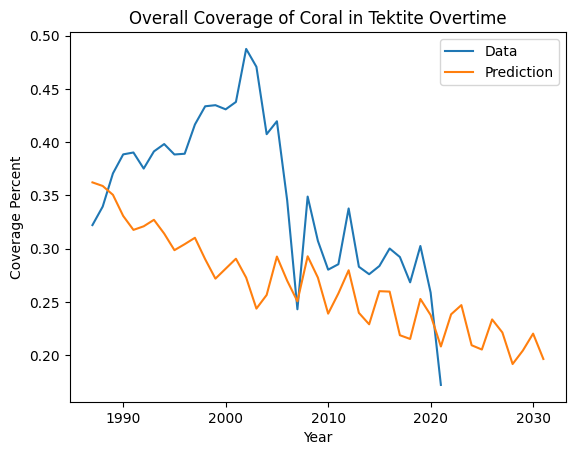

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_tektite_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_tektite,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_tektite_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

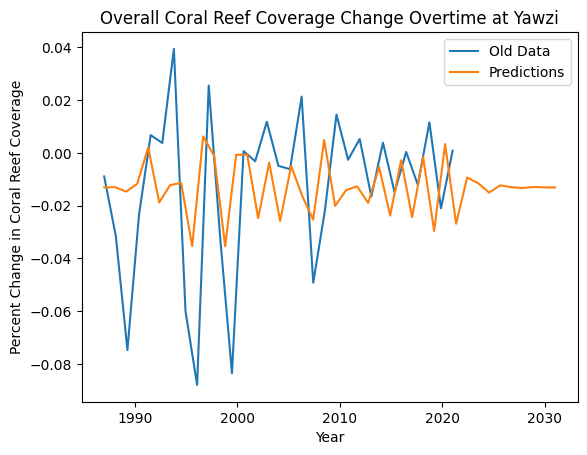

In [ ]:
df_yawzi = df[df['site']=='Yawzi']
avg_percent_cover_allcoral_yawzi = df_yawzi.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std = sm_arma(avg_percent_cover_allcoral_yawzi)
z = np.diff(avg_percent_cover_allcoral_yawzi)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Yawzi')
plt.legend()
plt.show()

In [ ]:
avg_percent_cover_allcoral_yawzi_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_yawzi_prediction += np.mean(avg_percent_cover_allcoral_yawzi.iloc[:5])
print(avg_percent_cover_allcoral_yawzi_prediction)

[ 0.38555971  0.37246817  0.35944836  0.34474639  0.33298091  0.33501673
  0.3162277   0.30397839  0.29259392  0.25723772  0.26344368  0.26222808
  0.2268333   0.2260619   0.2253486   0.20061226  0.1968574   0.1710331
  0.16607613  0.14979324  0.12447441  0.12930944  0.10919155  0.09508222
  0.08237367  0.06340405  0.05799597  0.03422338  0.03143972  0.00708826
  0.00549574 -0.02409857 -0.02078671 -0.04766335 -0.05700943 -0.06851678
 -0.08360924 -0.09593488 -0.10893062 -0.12229362 -0.13524803 -0.14834663]


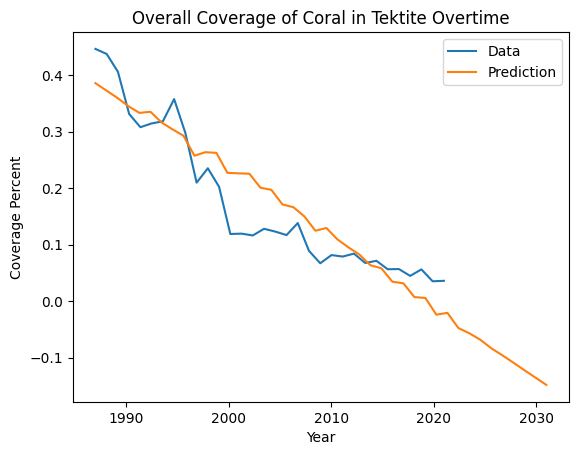

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_yawzi_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_yawzi,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_yawzi_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

We also want to look at how ocean temperature affects the growth and loss of coral reefs. We observe an additional dataset recording the temperatures of the ocean in the U.S. Virgin Islands.

# Classical Decomposition of Coral Coverage

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
import scipy.linalg as la
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [ ]:
coral = pd.read_csv('coral_dataset.csv', index_col='Date')
coral = coral[coral['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
coral = coral[coral['percentCover_macroalgae'] != 'nd']
coral = coral[coral['percentCover_allCoral'] != 'nd']

In [ ]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
coral[columns_to_cast] = coral[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
coral[columns_to_cast] = coral[columns_to_cast]/100
coral['percentCover_other'] = 1 - (coral['percentCover_CTB']+coral['percentCover_macroalgae']) #add in another column for other types of coral

In [ ]:
# convert the date column to date time objects
coral.index = pd.to_datetime(coral.index)
coral

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


In [ ]:
all_coral = coral['percentCover_allCoral']

In [ ]:
all_coral = all_coral.sort_index()
all_coral

In [ ]:
#all_coral_yawzi
all_coral_tekite = coral[coral['site'] == 'Tektite']
all_coral_tekite = all_coral_tekite['percentCover_allCoral']
all_coral_tekite.astype('float')

all_coral_yawzi = coral[coral['site'] == 'Yawzi']
all_coral_yawzi = all_coral_yawzi['percentCover_allCoral']
all_coral_yawzi.astype('float')

Date
1987-12-01    0.570
1987-12-01    0.230
1987-12-01    0.800
1987-12-01    0.670
1987-12-01    0.481
              ...  
2021-07-01    0.000
2021-07-01    0.000
2021-07-01    0.005
2021-07-01    0.005
2021-07-01    0.035
Name: percentCover_allCoral, Length: 1116, dtype: float64

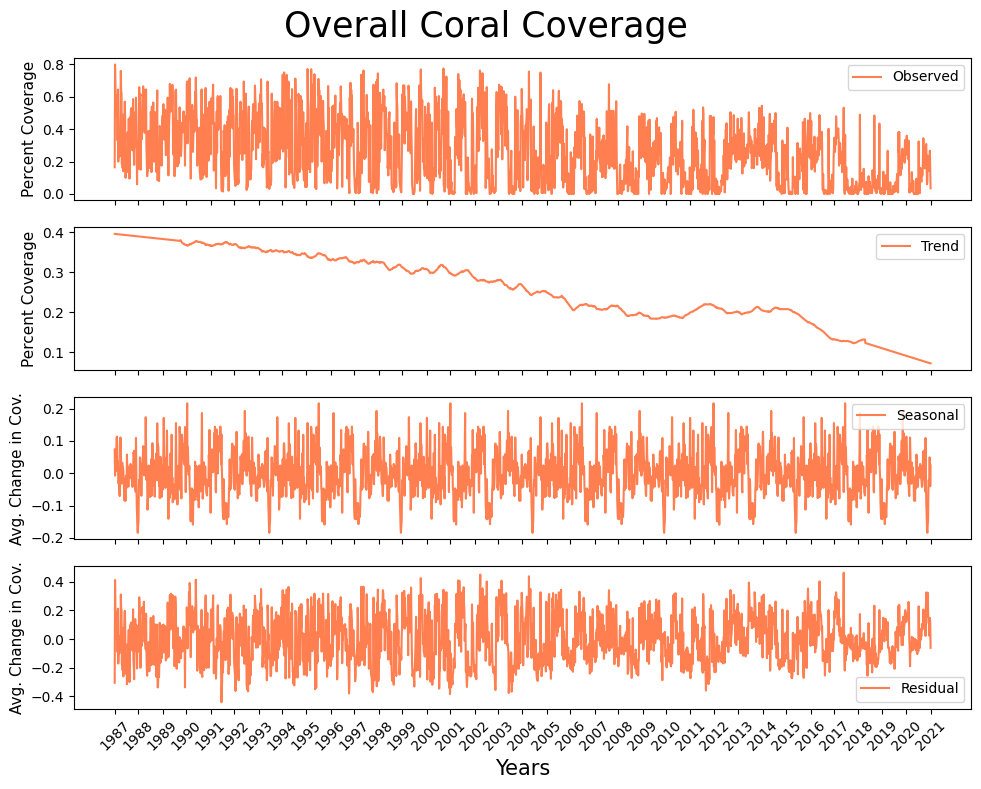

In [ ]:
# Decompose the overall coral data
trends = seasonal_decompose(all_coral.sort_index().values, model='additive', period=365, extrapolate_trend='freq')

# Generate a date range for the x-axis
date_range = pd.date_range(start='1987-12-01', periods=2264, freq='D')

# Calculate indices for each year
start_year = 1987
end_year = 2021
years = range(start_year, end_year + 1)
year_indices = np.linspace(0, len(date_range) - 1, num=len(years), dtype=int)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex='col')  # 4 rows, 1 column, shared x-axis

# Plot observed component
axes[0].plot(trends.observed, label='Observed', color='coral')
axes[0].set_ylabel('Percent Coverage', fontsize = 11)
axes[0].legend()

#plot the Trend
axes[1].plot(trends.trend, label='Trend', color='coral')
axes[1].set_ylabel('Percent Coverage', fontsize = 11)
axes[1].legend()

#plot the seasonality
axes[2].plot(trends.seasonal, label='Seasonal', color='coral')
axes[2].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[2].legend()

#plot the Residual
axes[3].plot(trends.resid, label='Residual', color='coral')
axes[3].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[3].legend()

# Set common x-axis properties
for ax in axes:
    ax.set_xticks(year_indices)
    ax.set_xticklabels(years, rotation=45)

# Add a super title
fig.suptitle('Overall Coral Coverage', fontsize=25)

# Set a common Y-Axis label
#fig.text(0.01, 0.5, 'Percent Coral Coverage', va='center', ha='center', rotation='vertical', fontsize=15)
plt.xlabel('Years', fontsize = 15)

# Optional: Adjust the layout
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.9, top=0.9, hspace=0.5)
plt.tight_layout()

# Save the figure
plt.savefig('Overall_decomp.png')

# Show the plot
plt.show()


In [ ]:
all_coral_yawzi.sort_index()

Date
1987-12-01    0.570
1987-12-01    0.420
1987-12-01    0.225
1987-12-01    0.140
1987-12-01    0.490
              ...  
2021-07-01    0.060
2021-07-01    0.015
2021-07-01    0.325
2021-07-01    0.045
2021-07-01    0.035
Name: percentCover_allCoral, Length: 1116, dtype: float64

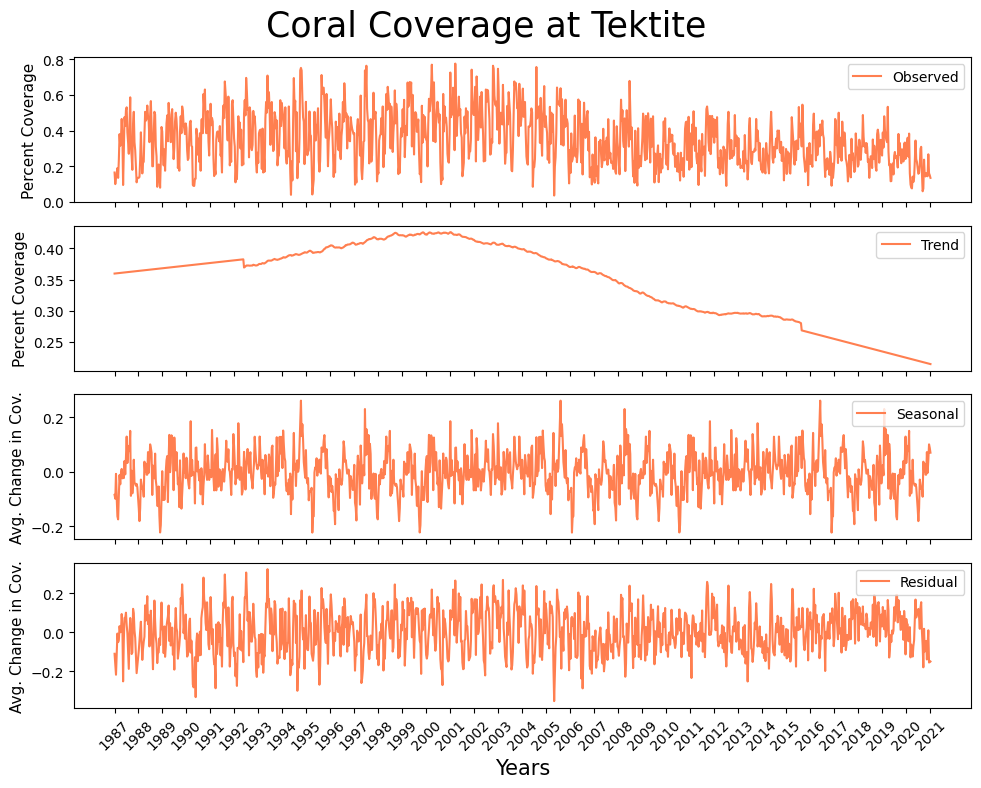

In [ ]:
# Decompose the coral data at Tektite
trends = seasonal_decompose(all_coral_tekite.sort_index().values, model='additive', period=365, extrapolate_trend='freq')

# Generate a date range for the x-axis
date_range = pd.date_range(start='1987-12-01', periods=1148, freq='D')

# Calculate indices for each year
start_year = 1987
end_year = 2021
years = range(start_year, end_year + 1)
year_indices = np.linspace(0, len(date_range) - 1, num=len(years), dtype=int)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)  # 4 rows, 1 column, shared x-axis

# Plot each component
axes[0].plot(trends.observed, label='Observed', color='coral')
axes[0].set_ylabel('Percent Coverage', fontsize = 11)
axes[0].legend()

axes[1].plot(trends.trend, label='Trend', color='coral')
axes[1].set_ylabel('Percent Coverage', fontsize = 11)
axes[1].legend()

axes[2].plot(trends.seasonal, label='Seasonal', color='coral')
axes[2].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[2].legend()

axes[3].plot(trends.resid, label='Residual', color='coral')
axes[3].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[3].legend()

# Set common x-axis properties
for ax in axes:
    ax.set_xticks(year_indices)
    ax.set_xticklabels(years, rotation=45)

# Add plot title and descriptions
fig.suptitle('Coral Coverage at Tektite', fontsize=25)
plt.xlabel('Years', fontsize = 15)

#Adjust the layout
plt.subplots_adjust(left=0.15, bottom=0.2, right=0.9, top=0.9, hspace=0.5)
plt.tight_layout()

# Save the figure and display it 
plt.savefig('Tektite_decomp.png')
plt.show()


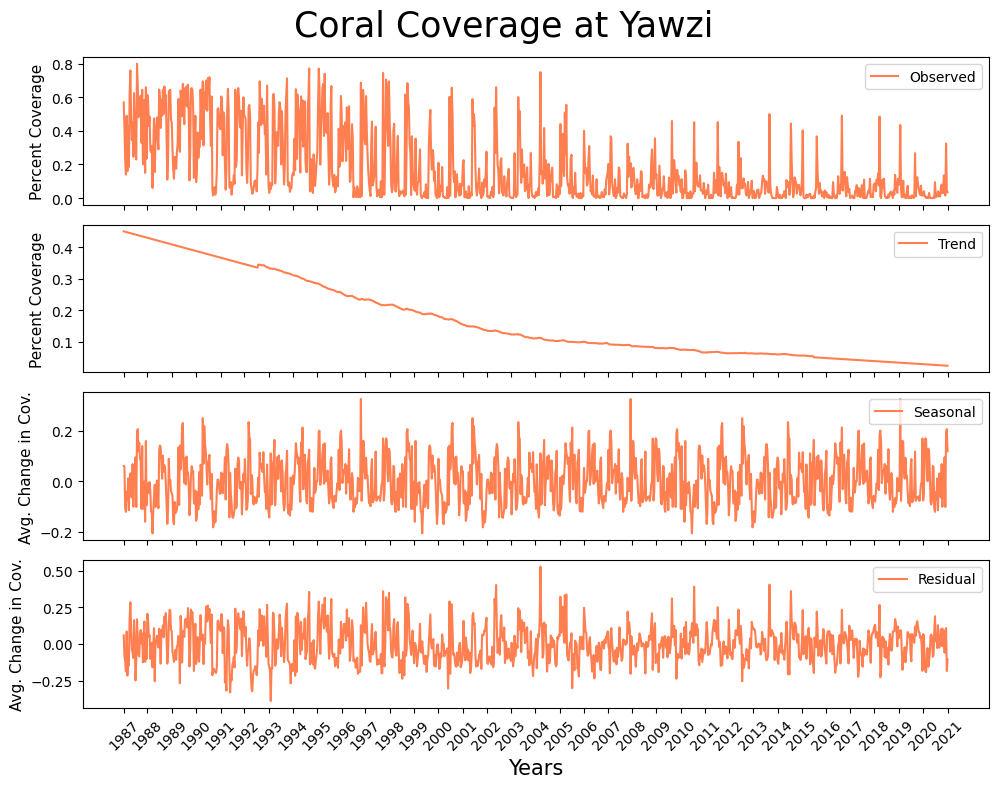

In [ ]:
# Decompose the yawzi coral data
trends = seasonal_decompose(all_coral_yawzi.sort_index().values, model='additive', period=365, extrapolate_trend='freq')

# Generate a date range for the x-axis
date_range = pd.date_range(start='1987-12-01', periods=1116, freq='D')

# Calculate indices for each year
start_year = 1987
end_year = 2021
years = range(start_year, end_year + 1)
year_indices = np.linspace(0, len(date_range) - 1, num=len(years), dtype=int)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)  # 4 rows, 1 column, shared x-axis

# Plot each component
axes[0].plot(trends.observed, label='Observed', color='coral')
axes[0].set_ylabel('Percent Coverage', fontsize = 11)
axes[0].legend()

axes[1].plot(trends.trend, label='Trend', color='coral')
axes[1].set_ylabel('Percent Coverage', fontsize = 11)
axes[1].legend()

axes[2].plot(trends.seasonal, label='Seasonal', color='coral')
axes[2].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[2].legend()

axes[3].plot(trends.resid, label='Residual', color='coral')
axes[3].set_ylabel('Avg. Change in Cov.', fontsize = 11)
axes[3].legend()

# Set common x-axis properties
for ax in axes:
    ax.set_xticks(year_indices)
    ax.set_xticklabels(years, rotation=45)

# Add a title and plot descriptions
fig.suptitle('Coral Coverage at Yawzi', fontsize=25)
plt.xlabel('Years', fontsize = 15)

#Adjust the layout
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.9, top=0.9, hspace=0.5)
plt.tight_layout()

# Save the figure and show the plot
plt.savefig('Yawzi_decomp.png')
plt.show()


In [ ]:
#read in the temperature data and set the index to datetime objects
sea_df = pd.read_csv("seawatertemp (1).csv", index_col = "Date") #read in the dataset 
sea_df.index = pd.to_datetime(sea_df.index)

#get the years from the dataframe
sea_df['year_column'] = sea_df.index.year
sea_df = sea_df[sea_df['Site'].isin(['Yawzi_NPS','Yawzi_9m'])]
specific_value_count = sea_df['Temperature'].value_counts()['nd']

#find empty values, and convert temperature values to floats
sea_df = sea_df[sea_df['Temperature'] != 'nd']
sea_df['Temperature'] = sea_df['Temperature'].astype(float)

#aggregate temperature per year
avg_sea_temp = sea_df.groupby('year_column')['Temperature'].mean()
avg_sea_temp

year_column
1989    27.153627
1990    27.421425
1991    27.324986
1992    27.485410
1993    27.564384
1994    27.395973
1995    27.806966
1996    27.342350
1997    27.808127
1998    28.170986
1999    27.994685
2000    27.482548
2001    27.725918
2002    27.691342
2003    27.361349
2004    28.469801
2005    28.213955
2006    28.030083
2007    28.029944
2008    27.474306
2009    27.650138
2010    28.339280
2011    27.727008
2012    27.858338
2013    27.045025
2014    28.770303
2015    28.070670
2016    27.617150
Name: Temperature, dtype: float64

In [ ]:
sea_temp_trends = seasonal_decompose(sea_df_new.values, model = 'additive', period = 365)

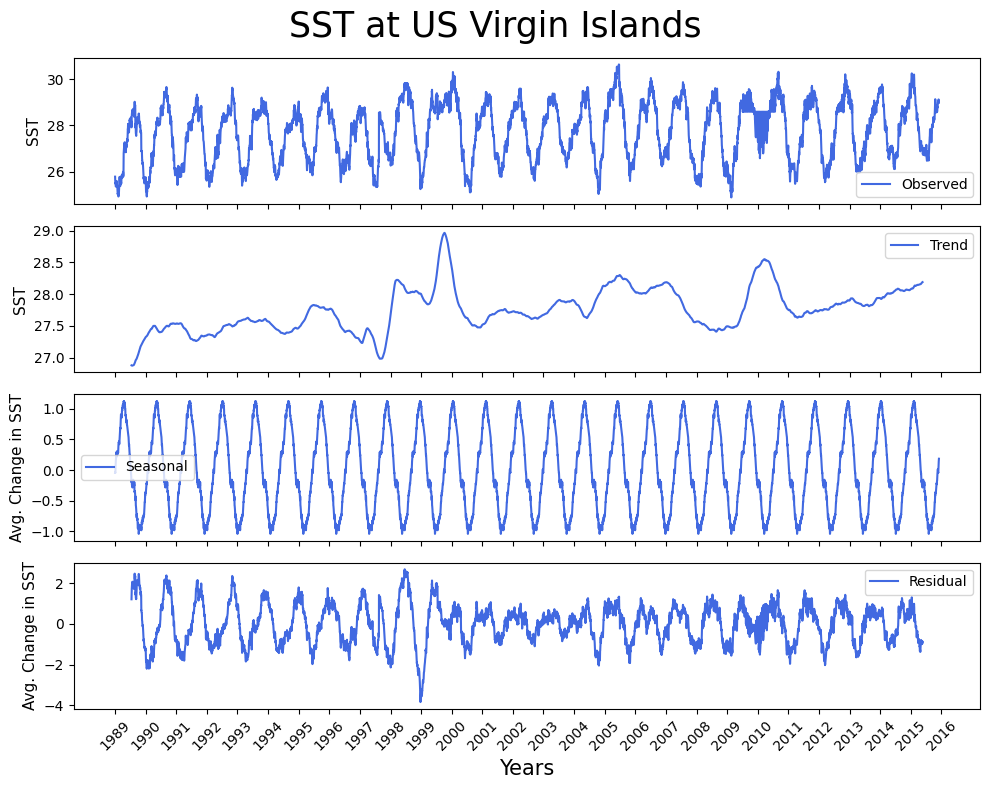

In [ ]:
# Generate a date range for the x-axis
date_range = pd.date_range(start='1989-01-01', periods=9163, freq='D')
# Calculate indices for each year
start_year = 1989
end_year = 2016
years = range(start_year, end_year + 1)
year_indices = np.linspace(0, len(date_range) - 1, num=len(years), dtype=int)

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)  # 4 rows, 1 column, shared x-axis

# Plot each component
axes[0].plot(sea_temp_trends.observed, label='Observed', color='royalblue')
axes[0].set_ylabel('SST', fontsize = 11)
axes[0].legend()

axes[1].plot(sea_temp_trends.trend, label='Trend', color='royalblue')
axes[1].set_ylabel('SST', fontsize = 11)
axes[1].legend()

axes[2].plot(sea_temp_trends.seasonal, label='Seasonal', color='royalblue')
axes[2].set_ylabel('Avg. Change in SST', fontsize = 11)
axes[2].legend()

axes[3].plot(sea_temp_trends.resid, label='Residual', color='royalblue')
axes[3].set_ylabel('Avg. Change in SST', fontsize = 11)
axes[3].legend()

# Set common x-axis properties
for ax in axes:
    ax.set_xticks(year_indices)
    ax.set_xticklabels(years, rotation=45)

# Add title, labels and adjust layout
fig.suptitle('SST at US Virgin Islands', fontsize=25)
plt.subplots_adjust(left=0.15, bottom=0.2, right=0.9, top=0.9, hspace=0.5)
plt.xlabel('Years', fontsize = 15)
plt.tight_layout()

# Save the figure
plt.savefig('new_sea_water.png')

# Show the plot
plt.show()


# ARIMA Train and Test Split

#### In this notebook, we test our ARIMA Model and find it's accuracy scores

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score

In [ ]:
coral = pd.read_csv('coral_dataset.csv', index_col='Date')
coral = coral[coral['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
coral = coral[coral['percentCover_macroalgae'] != 'nd']
coral = coral[coral['percentCover_allCoral'] != 'nd']

In [ ]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
coral[columns_to_cast] = coral[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
coral[columns_to_cast] = coral[columns_to_cast]/100
coral['percentCover_other'] = 1 - (coral['percentCover_CTB']+coral['percentCover_macroalgae']) #add in another column for other types of coral

In [ ]:
# convert the date column to date time objects
coral.index = pd.to_datetime(coral.index)
coral

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480
...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300


In [ ]:
explore_df = coral[coral['site'] == 'Yawzi']
explore_df = explore_df[explore_df['quadrat'] == 'T1Q1']
explore_df

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other
Date,,,,,,,
1987-12-01,Yawzi,1,T1Q1,0.570,0.005,0.215,0.780
1988-03-01,Yawzi,1,T1Q1,0.490,0.000,0.250,0.750
1988-07-01,Yawzi,1,T1Q1,0.440,0.005,0.290,0.705
1989-04-01,Yawzi,1,T1Q1,0.480,0.035,0.235,0.730
1989-10-01,Yawzi,1,T1Q1,0.510,0.040,0.145,0.815
1990-09-01,Yawzi,1,T1Q1,0.520,0.085,0.075,0.840
1991-03-01,Yawzi,1,T1Q1,0.450,0.000,0.085,0.915
1992-05-01,Yawzi,1,T1Q1,0.517,0.000,0.189,0.811
1993-06-01,Yawzi,1,T1Q1,0.648,0.075,0.140,0.785


In [ ]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])

In [ ]:
def sm_arma(array, p_max=3, q_max=3, n=10):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    #take a difference quotient and separate into train and test sets
    z = np.diff(array)
    train = z[:25]
    test = z[25:]

    #initialize attributes of our data
    best_aic = np.inf
    best_model = None
    best_p = None
    best_q = None
    best_std = None

    #perform a grid search on p and q
    for p in range(1,p_max+1):
        for q in range(1,q_max+1):

            #fit the model on the training data
            model = ARIMA(train,order=(p,0,q),trend='c').fit(method='innovations_mle') #set the model and then check if best
            aic = model.aic

            #check if AIC has decreased
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_p = p
                best_q = q
                best_std = model.resid
    
    #return desired value after prediciton
    final = best_model.predict(start=0,end=len(z)+n)
    predictions = final[30:30+len(test)]

    #calculate error metrics to determine success of model
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test, predictions)
    
    return best_aic,final,np.std(best_std), [mae, mse, rmse, r2]

In [ ]:
percent_cover_all_coral = np.array(explore_df['percentCover_allCoral'])

In [ ]:
aic, final,std, scores = sm_arma(percent_cover_all_coral)

In [ ]:
MAE,MSE,RMSE,R2= scores[0],scores[1],scores[2],scores[3]

In [ ]:
z = np.diff(percent_cover_all_coral)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))

In [ ]:
coral['year_column'] = coral.index.year
coral

,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB,percentCover_other,year_column
Date,,,,,,,,
1987-12-01,Tektite,1,T1Q1,0.165,0.035,0.060,0.905,1987
1987-12-01,Tektite,1,T1Q2,0.100,0.060,0.740,0.200,1987
1987-12-01,Tektite,1,T1Q3,0.135,0.035,0.450,0.515,1987
1987-12-01,Tektite,1,T1Q4,0.155,0.065,0.615,0.320,1987
1987-12-01,Tektite,1,T1Q5,0.190,0.040,0.480,0.480,1987
...,...,...,...,...,...,...,...,...
2021-07-01,Yawzi,nd,6,0.000,0.300,0.500,0.200,2021
2021-07-01,Yawzi,nd,7,0.000,0.285,0.455,0.260,2021
2021-07-01,Yawzi,nd,8,0.005,0.350,0.350,0.300,2021


### Tektite ARIMA with error scores

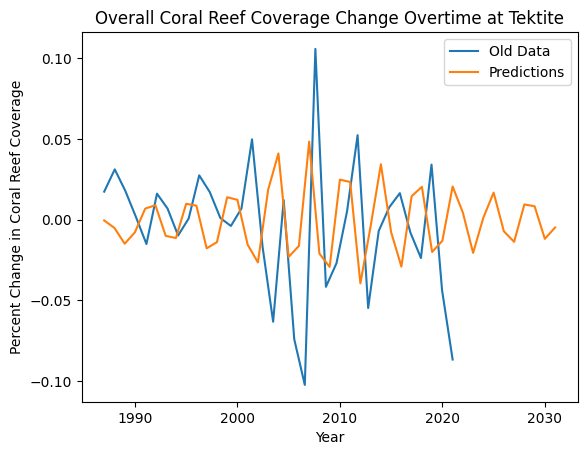

In [ ]:
df_tektite = coral[coral['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std,scores = sm_arma(avg_percent_cover_allcoral_tektite)
z = np.diff(avg_percent_cover_allcoral_tektite)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Tektite')
plt.legend()
plt.show()

In [ ]:
MAE,MSE,RMSE,R2= scores[0],scores[1],scores[2],scores[3]

In [ ]:
aic

-86.68223450031562

In [ ]:
avg_percent_cover_allcoral_tektite_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_tektite_prediction += np.mean(avg_percent_cover_allcoral_tektite.iloc[:5])

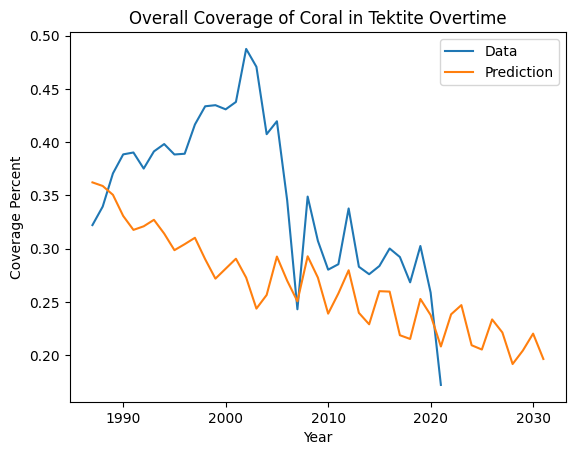

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_tektite_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_tektite,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_tektite_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

### Yawzi ARIMA with Error Metrics

In [ ]:
avg_percent_cover_allcoral_yawzi

year_column
1987    0.446172
1988    0.437217
1989    0.405708
1990    0.331034
1991    0.307667
1992    0.314350
1993    0.318067
1994    0.357400
1995    0.297433
1996    0.209533
1997    0.235000
1998    0.202133
1999    0.118700
2000    0.119333
2001    0.116133
2002    0.127900
2003    0.122967
2004    0.116767
2005    0.138033
2006    0.088833
2007    0.066933
2008    0.081400
2009    0.078767
2010    0.084000
2011    0.067433
2012    0.071267
2013    0.056333
2017    0.056667
2018    0.044567
2019    0.056075
2020    0.035033
2021    0.035867
Name: percentCover_allCoral, dtype: float64

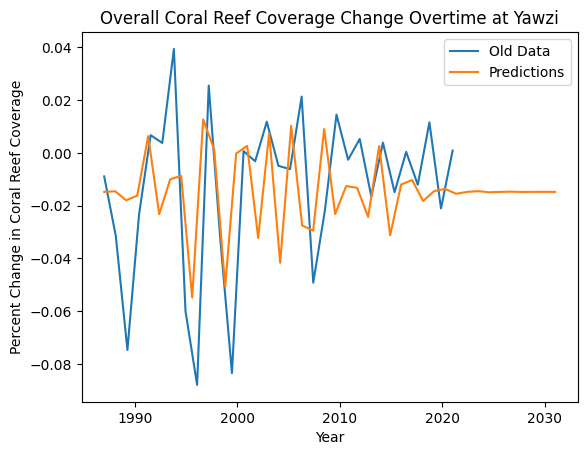

In [ ]:
df_yawzi = coral[coral['site']=='Yawzi']
avg_percent_cover_allcoral_yawzi = df_yawzi.groupby('year_column')['percentCover_allCoral'].mean()
aic, final,std,scores = sm_arma(avg_percent_cover_allcoral_yawzi)
z = np.diff(avg_percent_cover_allcoral_yawzi)
time = np.linspace(1987,2021,len(z))
time2 = np.linspace(1987,2021+10,len(final))
plt.plot(time,z,label='Old Data')
plt.plot(time2,final,label='Predictions')
plt.xlabel('Year')
plt.ylabel('Percent Change in Coral Reef Coverage')
plt.title('Overall Coral Reef Coverage Change Overtime at Yawzi')
plt.legend()
plt.show()

In [ ]:
MAE,MSE,RMSE,R2= scores[0],scores[1],scores[2],scores[3]

In [ ]:
aic

-99.48838625249137

In [ ]:
avg_percent_cover_allcoral_yawzi_prediction = np.array([np.sum(final[:i]) for i in range(len(final))])
avg_percent_cover_allcoral_yawzi_prediction += np.mean(avg_percent_cover_allcoral_yawzi.iloc[:5])

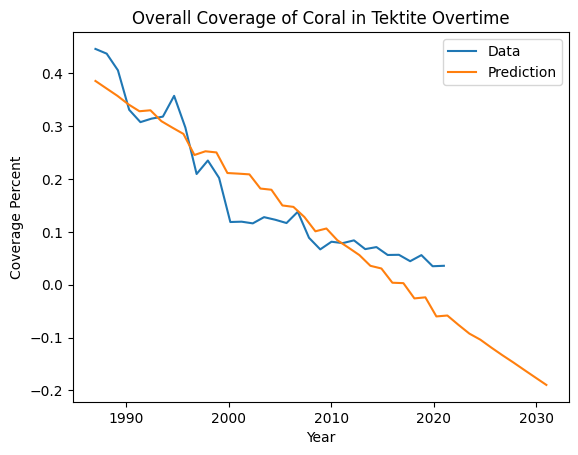

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_yawzi_prediction))
plt.plot(new_time,avg_percent_cover_allcoral_yawzi,label='Data')
plt.plot(new_time2,avg_percent_cover_allcoral_yawzi_prediction,label='Prediction')
plt.title('Overall Coverage of Coral in Tektite Overtime')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()
plt.show()

# Kalman Filtering Code

In this notebook we will explore our intiail dataset. The dataset contains data about coral coverage in two different main locations over multiple decades.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

In [ ]:
df = pd.read_csv("coral_dataset.csv") #read in the dataset

In [ ]:
df #print and look at the data set 

,Date,site,transect,quadrat,percentCover_allCoral,percentCover_macroalgae,percentCover_CTB
0,1987/12/01,Tektite,1,T1Q1,16.5,3.5,6
1,1987/12/01,Tektite,1,T1Q2,10,6,74
2,1987/12/01,Tektite,1,T1Q3,13.5,3.5,45
3,1987/12/01,Tektite,1,T1Q4,15.5,6.5,61.5
4,1987/12/01,Tektite,1,T1Q5,19,4,48
...,...,...,...,...,...,...,...
2278,2021/07/01,Yawzi,nd,6,0.0,30.0,50.0
2279,2021/07/01,Yawzi,nd,7,0.0,28.5,45.5
2280,2021/07/01,Yawzi,nd,8,0.5,35.0,35.0
2281,2021/07/01,Yawzi,nd,9,0.5,42.0,42.5


In [ ]:
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
print(len(df))

2264


In [ ]:
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral

In [ ]:
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, norm

In [ ]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
df.index = pd.to_datetime(df.index)
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()

tek = np.diff(avg_percent_cover_allcoral_tektite)

In [ ]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
df.index = pd.to_datetime(df.index)
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Yawzi']
avg_percent_cover_allcoral_yawzi = df_tektite.groupby('year_column')['percentCover_allCoral'].mean()

yaw = np.diff(avg_percent_cover_allcoral_tektite)

In [ ]:

class KalmanFilter(object):
    def __init__(self,F,Q,H,R,u):
        """
        Initialize the dynamical system models.
        
        Parameters
        ----------
        F : ndarray of shape (n,n)
            The state transition model.
        Q : ndarray of shape (n,n)
            The covariance matrix for the state noise.
        H : ndarray of shape (m,n)
            The observation model.
        R : ndarray of shape (m,m)
            The covariance matrix for observation noise.
        u : ndarray of shape (n,)
            The control vector.
        """
        #save attributes
        self.F=F
        self.Q=Q
        self.H=H
        self.R=R
        self.u=u
    
    def evolve(self,x0,N):
        """
        Compute the first N states and observations generated by the Kalman system.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state.
        N : integer
            The number of time steps to evolve.

        Returns
        -------
        states : ndarray of shape (n,N)
            The i-th column gives the i-th state.
        obs : ndarray of shape (m,N)
            The i-th column gives the i-th observation.
        """
        #initialize states matrix
        n=len(x0)
        m=len(self.H@x0)
        states=np.zeros((n,N))
        states[:,0]=x0
        obs=np.zeros((m,N))
        obs[:,0]=self.H@(states[:,0])
        for i in range(1,N):
            #get noise
            w=np.random.multivariate_normal(np.zeros_like(states[:,0]), self.Q)
            v=np.random.multivariate_normal(np.zeros_like(obs[:,0]), self.R)
            #update states
            states[:,i]=self.F@states[:,i-1]+self.u+w
            #update obs
            obs[:,i]=self.H@states[:,i]+v
        return states, obs

    def estimate(self,x0,P0,z, return_norms = False):
        """
        Compute the state estimates using the kalman filter.

        Parameters
        ----------
        x0 : ndarray of shape (n,)
            The initial state estimate.
        P0 : ndarray of shape (n,n)
            The initial error covariance matrix.
        z : ndarray of shape(m,N)
            Sequence of N observations (each column is an observation).

        Returns
        -------
        out : ndarray of shape (n,N)
            Sequence of state estimates (each column is an estimate).
        """
        #initialize states matrix
        n=len(x0)
        m,N=z.shape
        states=np.zeros((n,N))
        P=P0
        states[:,0]=x0
        #iterate to get states
        for i in range(1,N):
            #predict phase
            xkk1=self.F@states[:,i-1]+self.u
            Pkk1=self.F@P@self.F.T+self.Q
            #update step
            y=z[:,i]-self.H@xkk1
            S=self.H@Pkk1@self.H.T+self.R
            K=Pkk1@self.H.T@inv(S)
            states[:,i]=xkk1+K@y
            P=(np.eye(n)-K@self.H)@P
        return states
            
    
    def predict(self,x,k):
        """
        Predict the next k states in the absence of observations.

        Parameters
        ----------
        x : ndarray of shape (n,)
            The current state estimate.
        k : integer
            The number of states to predict.

        Returns
        -------
        out : ndarray of shape (n,k)
            The next k predicted states.
        """
        #initialize states matrix
        n=len(x)
        states=np.zeros((n,k))
        states[:,0]=self.F@x+self.u
        #iterate to get k next steps
        for i in range(1,k):
            states[:,i]=self.F@states[:,i-1]+self.u
        return states
    
    def rewind(self,x,k):
        """
        Predict the states from time 0 through k-1 in the absence of observations.
    
        Parameters
        ----------
        x : ndarray of shape (n,)
            The state estimate at time k.
        k : integer
            The current time step.
    
        Returns
        -------
        out : ndarray of shape (n,k)
            The predicted states from time 0 up through k-1 (in that order).
        """
        #get F^-1
        Finv=inv(self.F)
        n=len(x)
        states=np.zeros((n,k))
        #get most previous step
        states[:,-1]=Finv@(x-self.u)
        #iterate to get k steps
        for i in range(k-2,-1,-1):
            states[:,i]=Finv@(states[:,i+1]-self.u)
        return states


In [ ]:
F=np.linspace(.05,2.5,20)
Q=np.linspace(0.001,0.02,4)
H=np.linspace(0.001,3,20)
R=np.linspace(0.0001,.5,4)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([avg_percent_cover_allcoral_yawzi.iloc[0]], 30)
                mse = np.mean((obs - np.array(avg_percent_cover_allcoral_yawzi)[-5])**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs

In [ ]:
f,q,h,r = (0.9526315789473685, 0.001, 0.1588421052631579, 0.0001)
kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
states, bestobs = kf.evolve([avg_percent_cover_allcoral_yawzi.iloc[0]], 40)

0.010863811043616518
(0.9526315789473685, 0.001, 1.263736842105263, 0.0001)


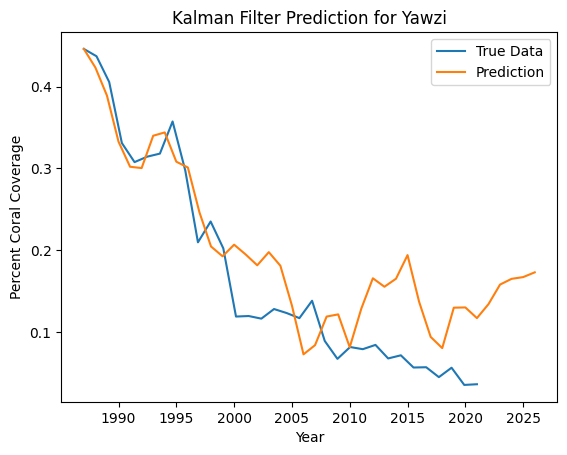

In [ ]:
print(best_mse)
print(best_params)
x = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
x1 = np.linspace(1987,2026,len(states[0]))
plt.plot(x,avg_percent_cover_allcoral_yawzi, label = 'True Data')
plt.plot(x1, states[0], label = 'Prediction')
plt.title('Kalman Filter Prediction for Yawzi')
plt.ylabel('Percent Coral Coverage')
plt.xlabel('Year')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
print(f"MSE for Yawzi Test {mean_squared_error(avg_percent_cover_allcoral_yawzi[-5:],states[0][30:-5])}")
print(f"RMSE for Yawzi Test {np.sqrt(mean_squared_error(avg_percent_cover_allcoral_yawzi[-5:],states[0][30:-5]))}")
print(f"MAE for Yawzi Test {mean_absolute_error(avg_percent_cover_allcoral_yawzi[-5:],states[0][30:-5])}")
print(f"R2 for Yawzi Test {r2_score(avg_percent_cover_allcoral_yawzi[-5:],states[0][30:-5])}")


MSE for Yawzi Test 0.004714895231061715
RMSE for Yawzi Test 0.06866509470656627
MAE for Yawzi Test 0.06436685871918293
R2 for Yawzi Test -52.6212451241687


In [ ]:
F=np.linspace(.05,1.5,20)
Q=np.linspace(0.001,0.03,4)
H=np.linspace(0.001,2,20)
R=np.linspace(0.0001,.5,4)
best_mse=np.inf
for f in F:
    for q in Q:
        for h in H:
            for r in R:
                kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
                states, obs= kf.evolve([avg_percent_cover_allcoral_tektite.iloc[0]], 30)
                mse = np.mean((obs - np.array(avg_percent_cover_allcoral_tektite)[-5])**2)
                if mse < best_mse:
                    best_mse = mse
                    best_params = (f,q,h,r)
                    beststates=states
                    bestobs=obs

In [ ]:
f,q,h,r = best_params
kf=KalmanFilter(np.array([[f]]),np.array([[q]]),np.array([[h]]),np.array([[r]]),u=np.zeros(1))
states, bestobs = kf.evolve([avg_percent_cover_allcoral_tektite.iloc[0]], 40)

0.0039343621682250895
(0.9657894736842105, 0.001, 0.9478947368421052, 0.0001)


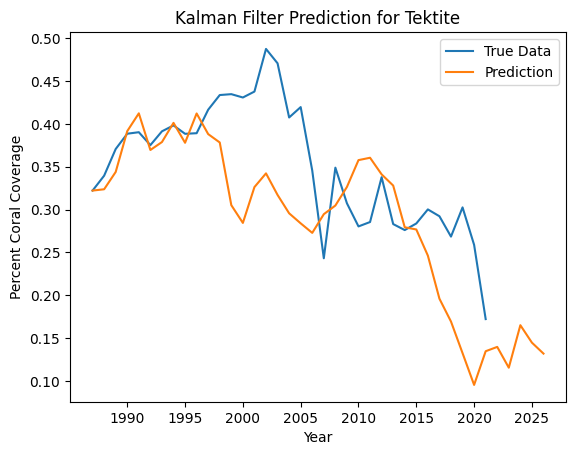

In [ ]:
print(best_mse)
print(best_params)
x = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
x1 = np.linspace(1987,2026,len(bestobs[0]))
plt.plot(x,avg_percent_cover_allcoral_tektite,label = 'True Data')
plt.plot(x1, states[0], label = 'Prediction')
plt.title('Kalman Filter Prediction for Tektite')
plt.ylabel('Percent Coral Coverage')
plt.xlabel('Year')
plt.legend()
plt.show()

In [ ]:
print(f"MSE for Tektite Test {mean_squared_error(avg_percent_cover_allcoral_tektite[-5:],states[0][30:-5])}")
print(f"RMSE for Tektite Test {np.sqrt(mean_squared_error(avg_percent_cover_allcoral_tektite[-5:],states[0][30:-5]))}")
print(f"MAE for Tektite Test {mean_absolute_error(avg_percent_cover_allcoral_tektite[-5:],states[0][30:-5])}")
print(f"R2 for Tektite Test {r2_score(avg_percent_cover_allcoral_tektite[-5:],states[0][30:-5])}")


MSE for Tektite Test 0.015251066164043328
RMSE for Tektite Test 0.12349520704887024
MAE for Tektite Test 0.1133635766891387
R2 for Tektite Test -6.165586205377412


# VARMAX Code

In this notebook, we experiment with predictions using a VARMAX model, something we have learned outside of class.

## Cleaning the data

In [ ]:
df = pd.read_csv("coral_dataset.csv", index_col = "Date") #read in the dataset 
specific_value_count = df['percentCover_CTB'].value_counts()['nd']
specific_value_count = df['percentCover_macroalgae'].value_counts()['nd']
specific_value_count = df['percentCover_allCoral'].value_counts()['nd']
df = df[df['percentCover_CTB'] != 'nd'] #drop all of the rows with these entries and then print out the amount of rows in our dataset
df = df[df['percentCover_macroalgae'] != 'nd']
df = df[df['percentCover_allCoral'] != 'nd']
columns_to_cast = ['percentCover_CTB', 'percentCover_macroalgae', 'percentCover_allCoral'] #get a list of the columns that we want to cast
df[columns_to_cast] = df[columns_to_cast].astype(float) #cast these columns as floats and divide by 100 to make the percents 
df[columns_to_cast] = df[columns_to_cast]/100
df['percentCover_other'] = 1 - (df['percentCover_CTB']+df['percentCover_macroalgae']) #add in another column for other types of coral
# convert the date column to date time objects
df.index = pd.to_datetime(df.index)


## Format dataframes for model

In [ ]:
df['year_column'] = df.index.year

df_tektite = df[df['site']=='Tektite']
avg_percent_cover_allcoral_tektite = df_tektite.groupby('year_column')[['percentCover_allCoral','percentCover_macroalgae', 'percentCover_CTB']].mean()
df_yawzi = df[df['site']=='Yawzi']
avg_percent_cover_allcoral_yawzi = df_yawzi.groupby('year_column')[['percentCover_allCoral','percentCover_macroalgae', 'percentCover_CTB']].mean()

## Varmax model without temp

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def varmax(array, name, p_max=3, q_max=3, n=10):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    train = array[:30]
    test = array[30:]
    # z = np.diff(array)
    
    best_aic = np.inf #set our values 
    best_model = None
    best_p = None
    best_q = None
    best_std = None
    for p in range(1,p_max+1): #iterate through p and q 
        for q in range(1,q_max+1):
            model = model = VARMAX(train, order=(p,q), seasonal_order=(0, 0, 0, 0),mle_regression = True,filter_concentrated = True)#set the model and then check if best
            model_fit = model.fit(disp=True)
            aic = model_fit.aic
            # aic = model.score()
            # aic = model.score_obs()
            if aic < best_aic:
                print("new")
                best_aic = aic
                best_model = model_fit
                best_p = p
                best_q = q
                # best_std = model.resid
    
    
    final = best_model.predict(start=0,end=len(train)+n) #return desired value after prediciton
    predictions = final[30:30+len(test)]
    print(len(final), len(predictions))
    mae = mean_absolute_error(test[name], predictions[name])
    mse = mean_squared_error(test[name], predictions[name])
    rmse = np.sqrt(mse)
    r2 = r2_score(test[name], predictions[name])

    return best_aic,final, [mae, mse, rmse, r2]

## Using the model for tektite and yawzi

In [ ]:
aic_tek, avg_percent_cover_allcoral_tektite_prediction, scores_tek = varmax(avg_percent_cover_allcoral_tektite,'percentCover_allCoral')
aic_yaw, avg_percent_cover_allcoral_Yawzi_prediction, scores_yaw = varmax(avg_percent_cover_allcoral_yawzi,'percentCover_allCoral')

In [ ]:
# print scores
print("Tektite")
print(f"aic: {aic_tek}")
print(f"scores: {scores_tek}")

print("Yawzi")
print(f"aic: {aic_yaw}")
print(f"scores: {scores_yaw}")

Tektite
aic: -217.8230022795396
scores: [0.045589966471170515, 0.004347603694286463, 0.06593636094209676, -1.0426853259397117]
Yawzi
aic: -189.70391296596947
scores: [0.03761063463535112, 0.00145484820469039, 0.03814247245119789, -8378.925659016539]


## Plot results

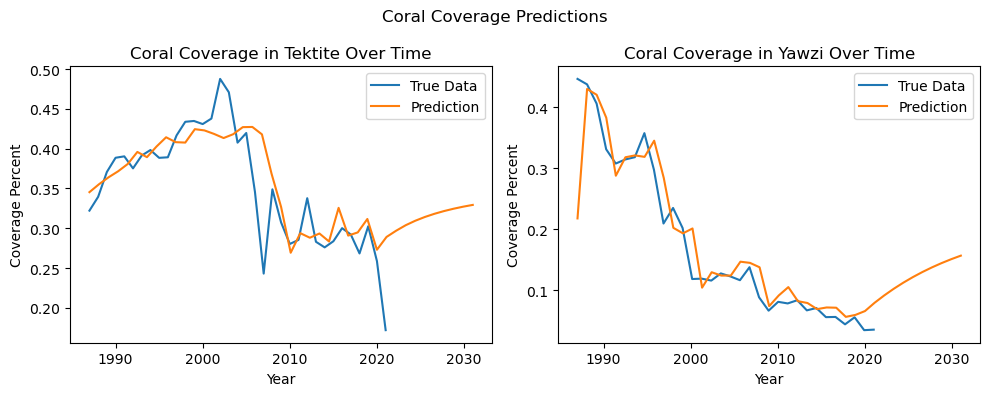

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_tektite_prediction))
['percentCover_allCoral','percentCover_macroalgae', 'percentCover_CTB']
plt.figure(figsize = (10,4))
plt.subplot(121)
plt.title('Coral Coverage in Tektite Over Time')
plt.plot(new_time,avg_percent_cover_allcoral_tektite['percentCover_allCoral'],label='True Data')
plt.plot(new_time2,avg_percent_cover_allcoral_tektite_prediction['percentCover_allCoral'],label='Prediction')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()

new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_Yawzi_prediction))
plt.subplot(122)
plt.title('Coral Coverage in Yawzi Over Time')
plt.plot(new_time,avg_percent_cover_allcoral_yawzi['percentCover_allCoral'],label='True Data')
plt.plot(new_time2,avg_percent_cover_allcoral_Yawzi_prediction['percentCover_allCoral'],label='Prediction')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()

plt.suptitle("Coral Coverage Predictions")
plt.tight_layout()
plt.legend()
plt.show()

## Varmax model including temp

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def varmax(array, name, p_max=3, q_max=3, n=10):
    """
    Build an ARMA model with statsmodel and
    predict future n values.

    Parameters:
        filename (str): data filename
        p_max (int): maximum order of autoregressive model
        q_max (int): maximum order of moving average model
        n (int): number of values to predict

    Return:
        aic (float): aic of optimal model
    """
    train = array[:23]
    test = array[23:]
    # z = np.diff(array)
    
    best_aic = np.inf #set our values 
    best_model = None
    best_p = None
    best_q = None
    best_std = None
    for p in range(1,p_max+1): #iterate through p and q 
        for q in range(1,q_max+1):
            model = model = VARMAX(train, order=(p,q), seasonal_order=(0, 0, 0, 0),mle_regression = True,filter_concentrated = True)#set the model and then check if best
            model_fit = model.fit(disp=True)
            aic = model_fit.aic
            # aic = model.score()
            # aic = model.score_obs()
            if aic < best_aic:
                print("new")
                best_aic = aic
                best_model = model_fit
                best_p = p
                best_q = q
                # best_std = model.resid
    
    
    final = best_model.predict(start=0,end=len(train)+n) #return desired value after prediciton
    predictions = final[len(train):len(train)+len(test)]
    print(predictions)
    print(len(final), len(predictions))
    mae = mean_absolute_error(test[name], predictions[name])
    mse = mean_squared_error(test[name], predictions[name])
    rmse = np.sqrt(mse)
    r2 = r2_score(test[name], predictions[name])

    return best_aic,final, [mae, mse, rmse, r2]

## loading/cleaning temp data

In [ ]:
sea_df = pd.read_csv("seawatertemp (1).csv", index_col = "Date") #read in the dataset 
sea_df.index = pd.to_datetime(sea_df.index)
sea_df['year_column'] = sea_df.index.year
sea_df = sea_df[sea_df['Site'].isin(['Yawzi_NPS','Yawzi_9m'])]
specific_value_count = sea_df['Temperature'].value_counts()['nd']
sea_df = sea_df[sea_df['Temperature'] != 'nd']
sea_df['Temperature'] = sea_df['Temperature'].astype(float)
year_means = sea_df.groupby('year_column')['Temperature'].mean()

## formating data to run model

In [ ]:
tek_temp = avg_percent_cover_allcoral_tektite.join(year_means)
tek_temp = tek_temp[2:]

yaw_temp = avg_percent_cover_allcoral_yawzi.join(year_means)
yaw_temp = tek_temp[2:]

## running model for tektite and yawzi

In [ ]:
aic_tek, avg_percent_cover_allcoral_tektite_prediction, scores_tek = varmax(tek_temp,'percentCover_allCoral')
aic_yaw, avg_percent_cover_allcoral_yawzi_prediction, scores_yaw = varmax(yaw_temp,'percentCover_allCoral')

In [ ]:
# print scores
print("Tektite")
print(f"aic: {aic_tek}")
print(f"scores: {scores_tek}")

print("Yawzi")
print(f"aic: {aic_yaw}")
print(f"scores: {scores_yaw}")

Tektite
aic: -176.94236839014184
scores: [0.107187507531975, 0.014749074286818393, 0.12144576685425636, -7.877664878410419]
Yawzi
aic: -145.7338022757362
scores: [0.07743817692092156, 0.009464714668263985, 0.09728676512385426, -5.105991653765369]


## Plot results

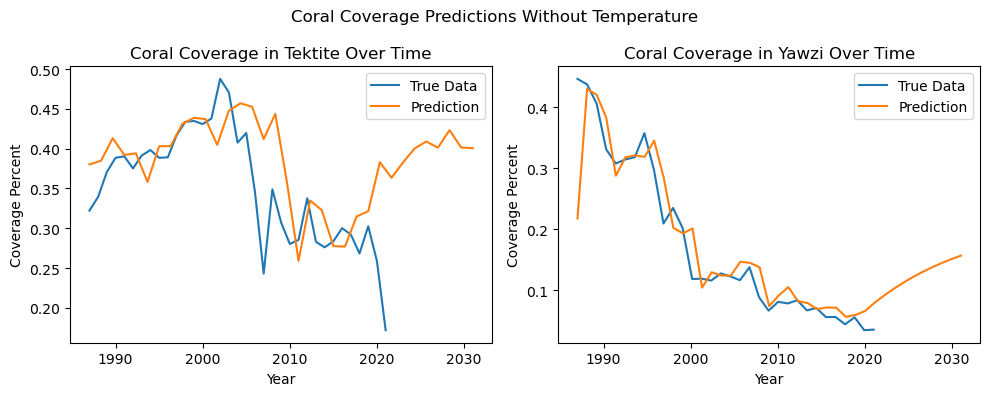

In [ ]:
new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_tektite))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_tektite_prediction))

plt.figure(figsize = (10,4))
plt.subplot(121)
plt.title('Coral Coverage in Tektite Over Time')
plt.plot(new_time,avg_percent_cover_allcoral_tektite['percentCover_allCoral'],label='True Data')
plt.plot(new_time2,avg_percent_cover_allcoral_tektite_prediction['percentCover_allCoral'],label='Prediction')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()

new_time = np.linspace(1987,2021,len(avg_percent_cover_allcoral_yawzi))
new_time2 = np.linspace(1987,2021+10,len(avg_percent_cover_allcoral_Yawzi_prediction))
plt.subplot(122)
plt.title('Coral Coverage in Yawzi Over Time')
plt.plot(new_time,avg_percent_cover_allcoral_yawzi['percentCover_allCoral'],label='True Data')
plt.plot(new_time2,avg_percent_cover_allcoral_Yawzi_prediction['percentCover_allCoral'],label='Prediction')
plt.xlabel('Year')
plt.ylabel('Coverage Percent')
plt.legend()

plt.suptitle("Coral Coverage Predictions Without Temperature")
plt.tight_layout()
plt.legend()
plt.show()